# Analyzing U.S COVID Vaccinations in 2021

by: Nikita Srinivasan, Pace Ockerman, Zachary Pandolfi 



# Outline
1. Introduction  
*   1.1 Background 
*   1.2 Installations and Library Imports

2. Data Collection 
*   2.1 About Data
*   2.2 Clean up & View Data 

3. Exploratory Data Analysis and Visualization 

4. Machine Learning 
*   4.1 Data Standardization
*   4.2 Model Training and Fitting 

5. Conclusion

6. Other Sources














# 1. Introduction
The goal of this project is to analyze the 2021 vaccination rates in Maryland and the relationship between an individual's race, age, and gender.

# 1.1 Background 
Currently, the United States is in the midst of the COVID-19 Pandemic. The states were hit hard by the millions of cases seen in the country since 2020. In December of 2020, the COVID-19 vaccine was approved for use and with a success rate of over 90%, the vaccine has helped to slow down COVID's powerful spread. According to Yale Medicine, the Pfizer and Moderna vaccines have 95% efficacy and J&J has 72% efficacy (Katella 2021). With the vaccine being so helpful, we were wondering why vaccination rates in certain demographics in Maryland were much lower or higher compared to others. We began to wonder what factors could potentially affect an individual's vaccination status. Does race have some effect on vaccination rate? What about gender, or even age? 

With these questions in mind, we wanted to conduct an in-depth analysis which would give insight to vaccination status based on these different demographics. We would like to determine a possible relationship between vaccination status, race, age, and gender. To further our understanding, we will also create a machine learning algorithm which can predict an individual's vaccination status, or likelihood of being vaccinated. The goal of this project is to create a new understanding of how demographics can affect a certain population's vaccination status, and potentially give insight to others on how we can increase vaccination rates as a country. This is important to data science as it is crucial to use technology to it's fullest extent to help us during a global pandemic. 

# 1.2 Installations and Library Imports

In [ ]:
!pip install sodapy



1.   pandas - can organize the data into dataframes
2.   numpy - offers mathematical functions to manipulate data
3.   sodapy - is a python client for Socrata API
4.   matplotlib - can create, format, and display different plots
5.   collections - offers specialized container data types 

pandas is a great tool to organize and sort large sets of data into user-friendly formats. For further information on pandas functions and how to correctly install and helpful user guidelines please refer to this source: https://pandas.pydata.org/
There are many sources alike to this source which will share the API for many helpful libraries necessary for data science and machine learning.

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.dates as mdates

# 2. Data Collection

# 2.1 About Data
Here, we are using data from multiple different sources to obtain comprehensive data points on vaccination status, race, age, and gender. Overall, the data set has about XXXX points. 

The data was retrieved from the following sources: https://opendata.maryland.gov/browse?category=Health+and+Human+Services

https://opendata.maryland.gov/browse?category=Demographic

It is important to note that our data focuses solely on Maryland demographics. 


In [ ]:
# Get data
client = Socrata("opendata.maryland.gov", None)

# Race data
results = client.get("juj8-ujbh", limit = 5000)
race_df = pd.DataFrame.from_records(results)
race_df = race_df.replace(np.NaN, 0)

# Gender data
results = client.get("8n25-hs3w", limit = 5000)
gender_df = pd.DataFrame.from_records(results)
gender_df = gender_df.replace(np.NaN, 0)

# Age data
results = client.get("5c95-vuxd", limit = 5000)
age_df = pd.DataFrame.from_records(results)
age_df = age_df.replace(np.NaN, 0)

# 2.2 Clean up & View Data

# Add single dose to first dose

In this block of code, we simplified the race column in order to more effectively work with the data. We did this by going through each row in the race column and returning a corresponding one word title for that specific race. We then applied this and created a new column called race simplified that made the data easier to work with. The df.head() function allows us to display the first n (5) rows of the data frame.

This was done through the help of the pandas to_numeric function. For more information on the signature of this function please refer to this source: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

In [ ]:
# Clean up and combine race names
# "Data not available", "unknown", and "federal entity" all become unknown
def simplify_race(row):
  if row['race'] == 'AMERICAN INDIAN OR ALASKAN NATIVE':
    return 'Native'
  elif row['race'] == 'WHITE':
    return 'White'
  elif row['race'] == 'BLACK OR AFRICAN AMERICAN':
    return 'Black'
  elif row['race'] == 'ASIAN':
    return 'Asian'
  elif row['race'] == 'OTHER':
    return 'Other'
  elif row['race'] == 'TWO OR MORE RACES':
    return 'Mixed'
  elif row['race'] == 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER':
    return 'Islander'
  else:
    return 'Unknown'

race_df['race_simplified'] = race_df.apply(simplify_race, axis=1)
race_df['vaccination_date'] = pd.to_datetime(race_df['vaccination_date'])
gender_df['vaccination_date'] = pd.to_datetime(gender_df['vaccination_date'])
race_df['firstdosedaily'] = pd.to_numeric(race_df['firstdosedaily'])
race_df['firstdosecumulative'] = pd.to_numeric(race_df['firstdosecumulative'])
race_df['seconddosecumulative'] = pd.to_numeric(race_df['seconddosecumulative'])
race_df['seconddosedaily'] = pd.to_numeric(race_df['seconddosedaily'])
race_df['singledosedaily'] = pd.to_numeric(race_df['singledosedaily'])
race_df['singledosecumulative'] = pd.to_numeric(race_df['singledosecumulative'])

race_df.head()

,vaccination_date,race,firstdosedaily,firstdosecumulative,seconddosecumulative,singledosecumulative,seconddosedaily,singledosedaily,race_simplified
0,2020-08-05 11:00:00,AMERICAN INDIAN OR ALASKAN NATIVE,1.0,1,0,0,0.0,0.0,Native
1,2020-08-21 11:00:00,AMERICAN INDIAN OR ALASKAN NATIVE,1.0,2,0,0,0.0,0.0,Native
2,2020-08-31 11:00:00,AMERICAN INDIAN OR ALASKAN NATIVE,1.0,3,0,0,0.0,0.0,Native
3,2020-09-05 11:00:00,AMERICAN INDIAN OR ALASKAN NATIVE,1.0,4,0,0,0.0,0.0,Native
4,2020-09-09 11:00:00,AMERICAN INDIAN OR ALASKAN NATIVE,0.0,4,1,0,1.0,0.0,Native


In [ ]:
# Combining doses
race_df['dose'] = race_df['firstdosecumulative'] + race_df['singledosecumulative']
gender_df['dose'] = pd.to_numeric(gender_df['firstdosecumulative']) + pd.to_numeric(gender_df['singledosecumulative'])
age_df['dose'] = age_df['combinedtotaldosescumulative']
race_df[race_df['race_simplified'] == 'White'].tail()

,vaccination_date,race,firstdosedaily,firstdosecumulative,seconddosecumulative,singledosecumulative,seconddosedaily,singledosedaily,race_simplified,dose
4023,2021-12-10 10:00:00,WHITE,2774.0,2188456,1971138,180981,3088.0,122.0,White,2369437
4024,2021-12-11 10:00:00,WHITE,1539.0,2189995,1974406,181030,3268.0,49.0,White,2371025
4025,2021-12-12 10:00:00,WHITE,1474.0,2191469,1975759,181054,1353.0,24.0,White,2372523
4026,2021-12-13 10:00:00,WHITE,2247.0,2193716,1978423,181144,2664.0,90.0,White,2374860
4027,2021-12-14 10:00:00,WHITE,1248.0,2194964,1979643,181187,1220.0,43.0,White,2376151


Here, we took the liberty of simplifying 'first dose' versus 'second dose' versus 'single dose' into one comprehensive column called 'dose' which just generally indicates whether a person has started the vaccination process. This column will be helpful to use later in the analysis.

# 3. Exploratory Data Analysis & Visualization

We created a chart with each race's first dose and second dose shown in a line plot to compare how much each race has of each dose. This chart allows us to identify the number of COVID vaccinations per race and the separation between the number of first doses and second doses. Another interesting aspect of this chart is that we had to ensure that the vaccination date occurred later than 2020 because for this specific project we want to only focus on COVID-19 vaccinations, as opposed to any SARS vaccine, like otherwise shown in our chart.

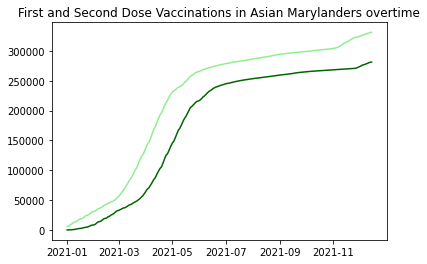

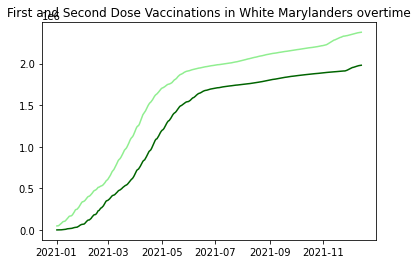

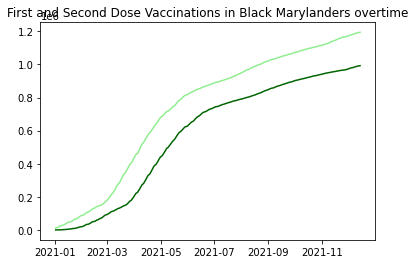

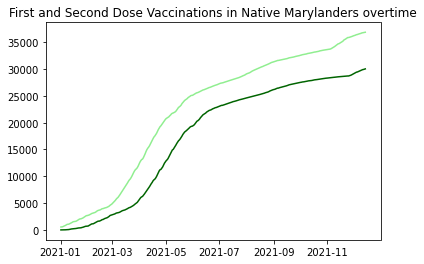

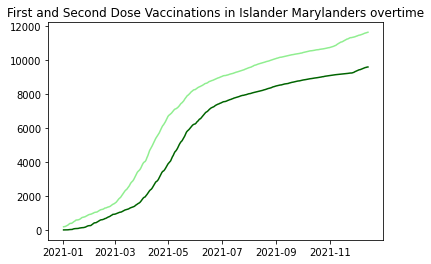

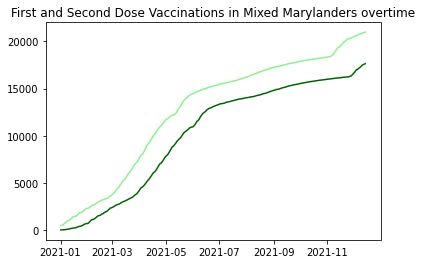

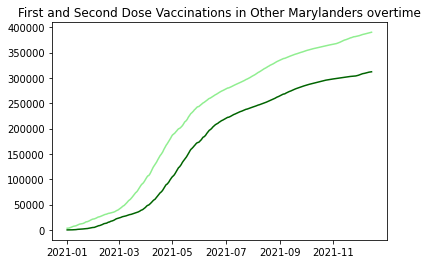

In [ ]:
# Race Plots Over time

# Asian Plot
temp_df = race_df[(race_df['race_simplified'] == "Asian") & (race_df['vaccination_date'] > '2021')]
fig, ax = plt.subplots()
plt.plot(temp_df.vaccination_date, temp_df.dose, color = 'lightgreen')
plt.plot(temp_df.vaccination_date, temp_df.seconddosecumulative, color = 'darkgreen')
plt.title("First and Second Dose Vaccinations in Asian Marylanders overtime")
plt.show()

# White Plot
temp_df = race_df[(race_df['race_simplified'] == "White") & (race_df['vaccination_date'] > '2021')]
fig, ax = plt.subplots()
plt.plot(temp_df.vaccination_date, temp_df.dose, color = 'lightgreen')
plt.plot(temp_df.vaccination_date, temp_df.seconddosecumulative, color = 'darkgreen')
plt.title("First and Second Dose Vaccinations in White Marylanders overtime")
plt.show()

# Black Plot
temp_df = race_df[(race_df['race_simplified'] == "Black") & (race_df['vaccination_date'] > '2021')]
fig, ax = plt.subplots()
plt.plot(temp_df.vaccination_date, temp_df.dose, color = 'lightgreen')
plt.plot(temp_df.vaccination_date, temp_df.seconddosecumulative, color = 'darkgreen')
plt.title("First and Second Dose Vaccinations in Black Marylanders overtime")
plt.show()

# Native Plot
temp_df = race_df[(race_df['race_simplified'] == "Native") & (race_df['vaccination_date'] > '2021')]
fig, ax = plt.subplots()
plt.plot(temp_df.vaccination_date, temp_df.dose, color = 'lightgreen')
plt.plot(temp_df.vaccination_date, temp_df.seconddosecumulative, color = 'darkgreen')
plt.title("First and Second Dose Vaccinations in Native Marylanders overtime")
plt.show()

# Islander Plot
temp_df = race_df[(race_df['race_simplified'] == "Islander") & (race_df['vaccination_date'] > '2021')]
fig, ax = plt.subplots()
plt.plot(temp_df.vaccination_date, temp_df.dose, color = 'lightgreen')
plt.plot(temp_df.vaccination_date, temp_df.seconddosecumulative, color = 'darkgreen')
plt.title("First and Second Dose Vaccinations in Islander Marylanders overtime")
plt.show()

# Mixed Plot
temp_df = race_df[(race_df['race_simplified'] == "Mixed") & (race_df['vaccination_date'] > '2021')]
fig, ax = plt.subplots()
plt.plot(temp_df.vaccination_date, temp_df.dose, color = 'lightgreen')
plt.plot(temp_df.vaccination_date, temp_df.seconddosecumulative, color = 'darkgreen')
plt.title("First and Second Dose Vaccinations in Mixed Marylanders overtime")
plt.show()

# Other Plotxsd
temp_df = race_df[(race_df['race_simplified'] == "Other") & (race_df['vaccination_date'] > '2021')]
fig, ax = plt.subplots()
plt.plot(temp_df.vaccination_date, temp_df.dose, color = 'lightgreen')
plt.plot(temp_df.vaccination_date, temp_df.seconddosecumulative, color = 'darkgreen')
plt.title("First and Second Dose Vaccinations in Other Marylanders overtime")
plt.show()

In order to successfully create these line plots, we used the library matplotlib.pyplot. In order to see more information on the signature of creating line plots, please refer to this source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

As you can see by the above plot, we notice that vaccination rates across all the races increased drastically from March - June and then started to level off and increase slowly and with less of a slope after June. This is explained by the fact that as more people get vaccinated in the peak season, there are less people available who are willing and ready to get the vaccine in later months as the peak vaccination season has passed. Additionally, we see that white Americans and black Americans have drastically higher numbers of vaccinations comparatively to other races. However, we have to consider the total population demographic of Maryland before making any conclusions from that piece of data. Finally, we see that there are still a large number of people who have not gotten their second dose in every race, as seen by the difference between the light green and the dark green line. Some potential factors of the lack of second dose could be fear of symptoms after having the first dose, people haven't had time to return for their second dose, or lack of knowledge that a second dose is necessary for the highest efficacy/protection from COVID-19.

In this block of code, we made two separate pie charts. The reason for this is so that we can accurately demonstrate percentages of vaccine per race while also keeping in mind the percentages of race in the Maryland population. The first pie chart on the top represents the percentage of people vaccinated in Maryland according to race. The second pie chart on the bottom represents the percentage of people in the state of Maryland by race. It was important to have both of these charts so we can make comparisons between the general population demographics and the percentage of people vaccinated. This allows us to accurately analyze which races are under-vaccinated compared with which races have received more vaccinations according to their make up of the population.

[2376151, 1194325, 331331, 36855, 11633, 20979, 390262]


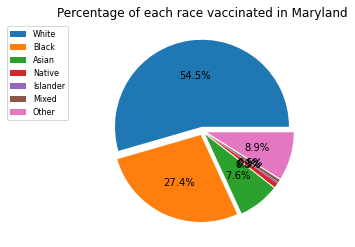

[3349484.0000000005, 1807149.4, 379688.8, 16928.8, 3023.0, 207377.8, 273279.2]


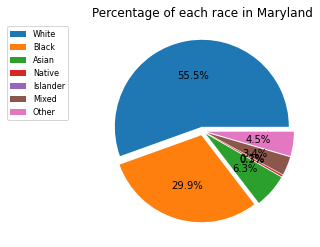

In [ ]:
num_white_first_dose = int(race_df[race_df['race_simplified'] == 'White'].tail(1)['dose'])
num_black_first_dose = int(race_df[race_df['race_simplified'] == 'Black'].tail(1)['dose'])
num_asian_first_dose = int(race_df[race_df['race_simplified'] == 'Asian'].tail(1)['dose'])
num_native_first_dose = int(race_df[race_df['race_simplified'] == 'Native'].tail(1)['dose'])
num_islander_first_dose = int(race_df[race_df['race_simplified'] == 'Islander'].tail(1)['dose'])
num_mixed_first_dose = int(race_df[race_df['race_simplified'] == 'Mixed'].tail(1)['dose'])
num_other_first_dose = int(race_df[race_df['race_simplified'] == 'Other'].tail(1)['dose'])

race_values = [num_white_first_dose, num_black_first_dose, num_asian_first_dose, num_native_first_dose, num_islander_first_dose, num_mixed_first_dose, num_other_first_dose]
label = ['White', 'Black', 'Asian', 'Native', 'Islander', 'Mixed', 'Other']
print(race_values)
plt.pie(race_values, explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05),labeldistance = 1.05, autopct='%1.1f%%')
plt.legend(label, loc='upper right', bbox_to_anchor=(-0.1, 1.),fontsize=8)
plt.title("Percentage of each race vaccinated in Maryland")
plt.show()



race_percents = [0.554, 0.2989, 0.0628, 0.0028, 0.0005, 0.0343, 0.0452]
def percent_to_total (percent):
  return percent * 6046000
race_totals = list(map(percent_to_total, race_percents))
print(race_totals)
plt.pie(race_totals, explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), labeldistance = 1.05, autopct='%1.1f%%')
plt.legend(label, loc='upper right', bbox_to_anchor=(-0.1, 1.),fontsize=8)
plt.title("Percentage of each race in Maryland")
plt.show()


In order to create the pie charts, we had to get the amount of people vaccinated by each race using the .tail() method and pulling from the database. We then used the library matplotlib.pyplot in order to plot the first pie chart showing the percentage of each race vaccinated and also displaying the numbers for each race. 

After that, we pulled statstics from https://worldpopulationreview.com/states/maryland-population in order to determine the percentage of the population of each race in Maryland so that we can compare this data to the percentage of people vaccinated. We were able to print a pie chart of this data and also multiply each portion of the pie chart by the total population in Maryland in order to see the amount of people of each race that currently live in Maryland.
For more information on creating pie charts, please refer to the following source: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html


As we can see from the pie charts above, the largest race to be vaccinated is white. However, looking comparatively to the pie chart with the percentage of Maryland citizens, we can identify that less white citizens are vaccinated compared to their representation in the total population. This is also similar with Black citizens as well. 27.4% of vaccinated individuals are black, however, they represent the next largest demographic in Maryland, so it seems as though a smaller amount of black citizens are vaccinated. What is surprising is the amount of Native and Other races that are vaccinated comparatively to their representation in the total population. For example, the 'Other' race category represents only 4.5% of Maryland's population, but 9% of the vaccinated population is in this 'other' race. After analyzing this further, we can identify that the numbers are close to being an almost balanced level of vaccinated population toward population, which means no one is being too under-represented.

The next chart we worked with was looking at the numbers and proportions of each gender that was vaccinated in Maryland through the representation of a bar chart. We thought this would be important in determining if there is a certain gender that is more hesitant to be vaccinated, or any discrepancies that we see with gender. This is useful so that we can gain more insight into how/where/and to who we can better promote the vaccine. We created this by creating an integer number (counter) for each gender who has received a dose in the chart and then using those numbers to create a bar chart using matplotlib.

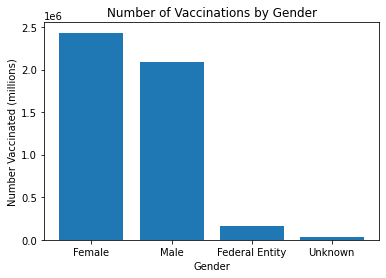

In [ ]:
# Correct Bar chart, for first dose

num_female_first_dose = int(gender_df[gender_df['gender'] == 'Female'].tail(1)['dose'])
num_male_first_dose = int(gender_df[gender_df['gender'] == 'Male'].tail(1)['dose'])
num_fe_first_dose = int(gender_df[gender_df['gender'] == 'Federal Entities'].tail(1)['dose'])
num_other_first_dose = int(gender_df[gender_df['gender'] == 'Unknown'].tail(1)['dose'])



plt.bar(['Female', 'Male', 'Federal Entity', 'Unknown'], [num_female_first_dose, num_male_first_dose, num_fe_first_dose, num_other_first_dose])
plt.title("Number of Vaccinations by Gender")
plt.xlabel("Gender")
plt.ylabel("Number Vaccinated (millions)")
plt.show()

For more information regarding the signature and creation of a bar graph, please refer to the following source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

According to the following source, https://worldpopulationreview.com/states/maryland-population, we can see from the population pyramid that the demographic for Maryland gender distributions is as follows - Female - 51.4%, Male - 48.6%. Because of how close these distributions are, we decided not to create a separate bar graph that showed the gender demographics in Maryland (like we did for the pie chart), however, we kept this in mind when conducting our analysis. As we can see from the bar graph above, the leading gender to be vaccinated is females. However, we should also account for the fact that there is about 3% more females than males in the population to begin with (3% of the population is about 18,138 people). The y-axis of this specific bar chart is scaled by millions, and about 500k more females are vaccinated than males. We also looked at two more groups in federal entities and unknown vaccinations because they were in the data. However, the main takeaway from this is that females are still the leading gender to be vaccinated. (3% discrepancy does not allot for the 500k discrepancy for vaccines). This got us thinking that males are more reluctant to be vaccinated than females, and something to keep in mind when deciding how the government should promote the vaccine.

The last dataframe we want to work with is our age dataset. This dataset basically displays vaccination numbers on given dates by a certain age range. Because of this, we decided the best type of chart to analyze our data would be a histogram, since this works well with age ranges and number frequencies (frequency of vaccines). In order to do this, we had to have a simplification of the age range column, and then we had to get the number of vaccinated people in each age range. We then made an array of people vaccinated given each age range and plotted this histogram. In the given histogram, we wanted to use bins of 0-90 in increments of 10 since this is how it was displayed in the dataframe.

Text(0.5, 1.0, 'Frequency of Vaccinated People by Age Range')

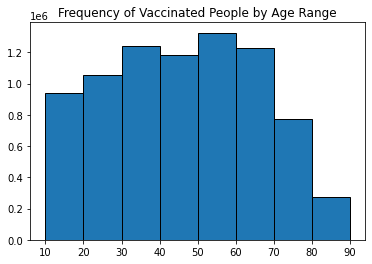

In [ ]:
def simplify_age(row):
  if row['agerange'] == 'age10to19':
    return '10 - 19'
  elif row['agerange'] == 'age20to29':
    return '20 - 29'
  elif row['agerange'] == 'age30to39':
    return '30 - 39'
  elif row['agerange'] == 'age40to49':
    return '40 - 49'
  elif row['agerange'] == 'age50to59':
    return '50 - 59'
  elif row['agerange'] == 'age60to69':
    return '60 - 69'
  elif row['agerange'] == 'age70to79':
    return '70 - 79'
  else:
    return '80+'

age_df['age_simplified'] = age_df.apply(simplify_age, axis=1)
age_df['vaccination_date'] = pd.to_datetime(race_df['vaccination_date'])
num_10to19_first_dose = int(age_df[age_df['age_simplified'] == '10 - 19'].tail(1)['dose'])
num_20to29_first_dose = int(age_df[age_df['age_simplified'] == '20 - 29'].tail(1)['dose'])
num_30to39_first_dose = int(age_df[age_df['age_simplified'] == '30 - 39'].tail(1)['dose'])
num_40to49_first_dose = int(age_df[age_df['age_simplified'] == '40 - 49'].tail(1)['dose'])
num_50to59_first_dose = int(age_df[age_df['age_simplified'] == '50 - 59'].tail(1)['dose'])
num_60to69_first_dose = int(age_df[age_df['age_simplified'] == '60 - 69'].tail(1)['dose'])
num_70to79_first_dose = int(age_df[age_df['age_simplified'] == '70 - 79'].tail(1)['dose'])
num_80plus_first_dose = int(age_df[age_df['age_simplified'] == '80+'].tail(1)['dose'])
ages = []
for x in range(num_10to19_first_dose):
  ages.append(15)
for x in range(num_20to29_first_dose):
  ages.append(25)
for x in range(num_30to39_first_dose):
  ages.append(35)
for x in range(num_40to49_first_dose):
  ages.append(45)
for x in range(num_50to59_first_dose):
  ages.append(55)
for x in range(num_60to69_first_dose):
  ages.append(65)
for x in range(num_70to79_first_dose):
  ages.append(75)
for x in range(num_80plus_first_dose):
  ages.append(85)
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
plt.hist(ages, bins, edgecolor='black')
plt.title('Frequency of Vaccinated People by Age Range')


As you can see above, we were able to differentiate between each age range in our dataframe. The histogram above shows that the age ranges of 30-40 and 50-60 are the most vaccinated, while 10-20 and 70-90 are the ranges with the least amount of vaccinated people. This can be explained by population percentages in Maryland and because the vaccine wasn't available to anyone under 12 up until recently. Overall, the age ranges make sense given the population.

# 4. Machine Learning

For the machine learning portion of the project we will be using linear regression with polynomial features to predict the total number of vaccinated people of a given race on some given date. 

A machine learning model is a model or algorithm which is trained to recognize patterns over a large set of data. There are many different types of models, which suit different data sets, and it is important to find one that fits your data accurately. Linear regression is a type of machine learning model which basically creates a linear function which will map features/variables to others well enough by fitting the data. There will be independent and dependent variables in which we will train the model with data that maps independent variables to output a dependent variable. In our case the independent variables are the date of vaccination and the race, and the output (dependent variable) is the number of that race vaccinated on that date. Typically, one uses regression to see how several variables are related, which is what the goal of the machine learning part of this project is. In order to learn more about linear regression in Python, please refer to the following source: https://realpython.com/linear-regression-in-python/

In order to learn more about the signature and how to implement linear regression in code, please refer to this source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [ ]:
# Machine Learning Imports
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime,date

In order to create the model, we first had to create dummy variable columns for the polynomial regression. To increase the accuracy of the model we used degree 5 polynomial features for race, but only 4 polynomial features for gender, since there are fewer variables (fewer genders than races). We selected this number so that it was accurate enough but we weren't risking the chance of making the model too complex and overfit the data. We created the model and then fit it to the data.

# 4.1 Data Standardization

In [ ]:
# Model for race

# Create dummy variable columns for polynomial regression
data = pd.concat([race_df, pd.get_dummies(race_df['race_simplified'])], axis = 1)

# We will be using a 5 degree polynomial to be more accurate, 
# but not too high as to cause overfitting 
poly_race = PolynomialFeatures(5)

# Create the actual model
y = data['dose']
data['time_number'] = data['vaccination_date'].map(datetime.toordinal)
X = np.column_stack((data['time_number'], data['Black'], data['Islander'], data['Mixed'], data['Native'], data['Other'], data['Unknown'], data['White']))
X_ = poly_race.fit_transform(X)
reg_race = LinearRegression().fit(X_, y)

# 4.2 Model Training and Fitting

In [ ]:
# Model for gender

# Create dummy variable columns for polynomial regression
data = pd.concat([gender_df, pd.get_dummies(gender_df['gender'])], axis = 1)

# We will be using a 4 degree polynomial here
poly_gender = PolynomialFeatures(4)

# Create the actual model
y = data['dose']
data['vaccination_date'] = pd.to_datetime(data['vaccination_date'])
data['time_number'] = data['vaccination_date'].map(datetime.toordinal)
X = np.column_stack((data['time_number'], data['Male'], data['Female'], data['Unknown']))
X_ = poly_gender.fit_transform(X)
reg_gender = LinearRegression().fit(X_, y)

Here we show some sample outputs of the model, giving the estimated number of vaccinated Asians (as a race example), and male and female vaccinations at the start of 2023.

In [ ]:
# This codeblock is for predictions

# Create the date of prediction
d=date(year = 2023, month = 1, day = 1)
d=d.toordinal()


# Predictions here, all 0's means asian, putting a 1 in the columns respectively means
# Black, Islander, Mixed, Native, Other, Unknown, White
# This prediction is number of Asians vaccinated in maryland on 2023/02/01
pred_asian = reg_race.predict(np.array(poly_race.fit_transform([[d, 0,0,0,0,0,0,0]])))

# Predictions for male, then female on the same date
pred_male = reg_gender.predict(np.array(poly_gender.fit_transform([[d, 1, 0, 0]])))
pred_female = reg_gender.predict(np.array(poly_gender.fit_transform([[d, 0, 1, 0]])))

print("On 2023/01/01 our models predicts that:")
print(str(round(pred_asian[0])) + " asians will be vaccinated in maryland.")
print(str(round(pred_male[0])) + " males will be vaccinated in maryland.")
print(str(round(pred_female[0])) + " females will be vaccinated in maryland.")

On 2023/01/01 our models predicts that:
399048 asians will be vaccinated in maryland.
329888 males will be vaccinated in maryland.
1027917 females will be vaccinated in maryland.


Here we plot the actual data vs our prediction model, where we can see that it very accurately plotted the general trend of the data.  The red lines are female while the blue lines are male, and the thinner lines are the actual data with the thick lines being our models prediction.

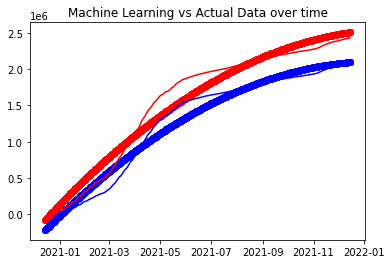

In [ ]:
#plt.plot(gender_df['vaccination_date'], reg_gender.predict(np.array(poly_gender.fit_transform([[data['time_number'], 1, 0, 0]]))))
gender_df['time_number'] = gender_df['vaccination_date'].map(datetime.toordinal)

for index, row in gender_df.iterrows():
  plt.plot(row['vaccination_date'], reg_gender.predict(np.array(poly_gender.fit_transform([[row['time_number'], 1, 0, 0]]))), 'bo', markersize = 6)
  plt.plot(row['vaccination_date'], reg_gender.predict(np.array(poly_gender.fit_transform([[row['time_number'], 0, 1, 0]]))), 'ro', markersize = 6)

temp_df = gender_df[(gender_df['gender'] == "Female") & (gender_df['vaccination_date'] > '2021')]
plt.plot(temp_df.vaccination_date, temp_df.dose, color = 'red')

temp_df = gender_df[(gender_df['gender'] == "Male") & (gender_df['vaccination_date'] > '2021')]
plt.plot(temp_df.vaccination_date, temp_df.dose, color = 'blue')

plt.title("Machine Learning vs Actual Data over time")
plt.show()

This plot allows us to see the accuracy of our models by looking at the difference between the actual data and the prediction model. We can see that there was no overfitting to the dataset (which is good) because the prediction is not 100% accurate or overfit. However, it is still very close to the actual trend, so we can consider this to be a strong model. For more information on the accuracy of ML models and overfitting & how to deal with it, please refer to the following source: https://towardsdatascience.com/is-your-model-overfitting-or-maybe-underfitting-an-example-using-a-neural-network-in-python-4faf155398d2


# 5. Conclusion
In conclusion, after analyzing the data and ML algorithms we have gained a lot of insight on vaccination rates amongst the different demographics in Maryland. This is useful and applicable to the real world as we can begin to promote the vaccine in more useful ways by catering these promotions to the demographics with lower vaccination rates. With more oriented promotions, we can hopefully increase the vaccination rates in Maryland and make our way towards ending, or at least slowing down, the COVID-19 Pandemic. 

# 6. Other Sources

1: https://www.yalemedicine.org/news/covid-19-vaccine-comparison 
This source can help you to navigate the different vaccines, what they are, how they are different, and their efficacies.  

2: https://worldpopulationreview.com/states/maryland-population 
This source gave us the population demographics of each race in the state of Maryland.

3: For more information on how to get the COVID-19 Vaccine, please refer to this link: https://www.cdc.gov/coronavirus/2019-ncov/vaccines/How-Do-I-Get-a-COVID-19-Vaccine.html